# Figure 3
- Construct adhesome loci neighborhood
- Identify genes in this neighborhood
- Demonstrate reinforcement by looking at the targets of TFs in this neighborhood

### Setup

In [71]:
# Import standard libraries
from importlib import reload
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
import scipy.stats as ss
import csv
import pandas as pd
import networkx as nx
import community
import pickle
from collections import defaultdict
import operator
from scipy.sparse import csr_matrix
import itertools
import os.path
import math
import pybedtools
import time
from tqdm import tqdm
import random
import OmicsIntegrator as oi
import gseapy
from gseapy.plot import barplot, dotplot
# Custom libraries
import utils as lu
# Reload modules in case of modifications
reload(lu)

<module 'utils' from '/home/louiscam/projects/gpcr/code/figures0/utils.py'>

In [72]:
# Directory of adhesome data
dir_adhesome = '/home/louiscam/projects/gpcr/data/adhesome_data/'
# Directory of genome data
dir_genome = '/home/louiscam/projects/gpcr/data/genome_data/'
# Directory of processed HiC
dir_processed_hic = '/home/louiscam/projects/gpcr/save/processed_hic_data_dir/'
# Directory for storing preliminary results
prelim_results_dir = '/home/louiscam/projects/gpcr/save/prelim_results_dir/'
# Directory of epigenomic data
epigenome_dir = '/home/louiscam/projects/gpcr/data/epigenome_data/'
processed_epigenome_data_dir = '/home/louiscam/projects/gpcr/save/processed_epigenome_data_dir/'
# Saving directory
saving_dir = '/home/louiscam/projects/gpcr/save/figures/'

In [73]:
# Specify directories and relevant information
cell_type = 'IMR90'
resol_str = '250kb'
resol = 250000
quality = 'MAPQGE30'

### Construct intraX edge list

In [74]:
# Load dictionary of active loci per chromosome
active_loci_dict = pickle.load(open(saving_dir+'active_loci_dict.pkl', 'rb'))

DescribeResult(nobs=1000643, minmax=(0.5009494983613157, 9.87427981922963), mean=3.2679340954677243, variance=1.5819793128947126, skewness=1.0381463778450506, kurtosis=2.3442328047321004)


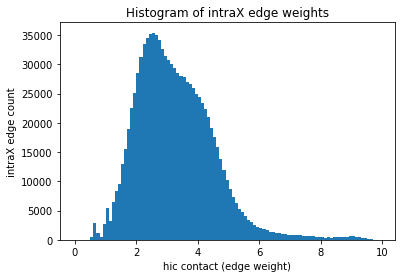

In [76]:
# Plot histogram of intraX edge weights (Hi-C contact values) between active loci
edge_list_intra = pickle.load(open(saving_dir+'edge_list_intra.pkl', 'rb'))
print(ss.describe(edge_list_intra['hic_contact']))
plt.figure()
plt.hist(edge_list_intra['hic_contact'],bins=np.arange(0,10,0.1))
#plt.vlines(3, ymin=0, ymax=100000, color='red')
plt.xlabel('hic contact (edge weight)')
plt.ylabel('intraX edge count')
#plt.yscale('log')
plt.title('Histogram of intraX edge weights')
plt.show()

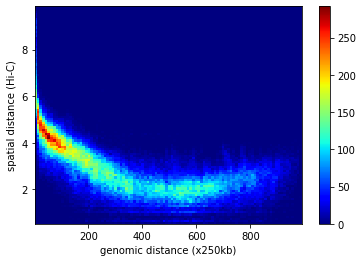

In [102]:
# Relationship between genomic distance and spatial distance
edges = edge_list_intra[edge_list_intra['chr']==1]
plt.figure()
plt.hist2d(edges['gen_dist'].values/resol, edges[0:167020]['hic_contact'].values,(100,100),cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('genomic distance (x250kb)')
plt.ylabel('spatial distance (Hi-C)')
plt.show()

### Construct interX edge list

DescribeResult(nobs=14992782, minmax=(0.44004094692730095, 7.5364672416389995), mean=1.2284616137501867, variance=0.21439608064705115, skewness=0.5631200415310013, kurtosis=0.1666007519747441)


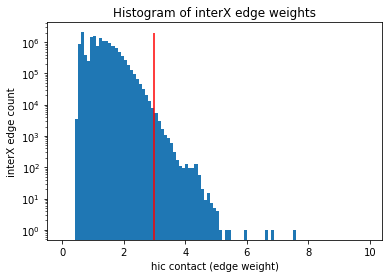

In [6]:
# Plot histogram of edge weights (Hi-C contact values) between active loci
edge_list_inter = pickle.load(open(saving_dir+'edge_list_inter.pkl', 'rb'))
print(ss.describe(edge_list_inter['hic_contact']))
plt.figure()
plt.hist(edge_list_inter['hic_contact'],bins=np.arange(0,10,0.1))
plt.vlines(3, ymin=0, ymax=2000000, color='red')
plt.xlabel('hic contact (edge weight)')
plt.ylabel('interX edge count')
plt.yscale('log')
plt.title('Histogram of interX edge weights')
plt.show()

In [107]:
# Compute edge significance
len(edge_list_inter)

14992782

### Compare intraX and interX edge list

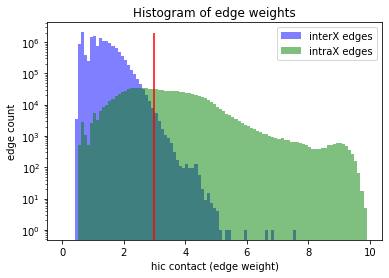

In [7]:
plt.figure()
plt.hist(edge_list_inter['hic_contact'],bins=np.arange(0,10,0.1), color='blue', alpha=0.5, label='interX edges', density=False)
plt.hist(edge_list_intra['hic_contact'],bins=np.arange(0,10,0.1), color='green', alpha=0.5, label='intraX edges', density=False)
plt.vlines(3, ymin=0, ymax=2000000, color='red')
plt.xlabel('hic contact (edge weight)')
plt.ylabel('edge count')
plt.yscale('log')
plt.title('Histogram of edge weights')
plt.legend()
plt.show()